# <b><u> Project Title : Bank Marketing Effectiveness Prediction  

#### **`Project Type`**    - Supervised learning (Classification problem)
#### **`Contribution`**    - Individual
#### **`Name`**            - Sarang Gami

## **<u>Github Link**

https://github.com/SarangGami/Bank-Marketing-Effectiveness-Prediction-Supervised-Learning

##**💾 <u>Problem statement**


- One of the Portuguese banking institution conducted a marketing campaign based on phone calls. The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyse the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to banks term deposit.
- Bank profitability depends on long-term deposits. Targeted marketing tactics that let customers interact with banks directly are the main focus of bank marketing.

##**📋<u>Summary**

- Banks are required to sell more long-term bank deposits to enhance their cash reserves right ? 

- Bank profitability depends on long-term deposits and Marketing executives are therefore under pressure to persuade the general public to buy long-term deposits. To increase the positive response rate, marketing managers should build better use of their limited resources by making fewer calls to customers while closing more sales. Because they already contain data from prior
campaigns to examine, managers may utilize data classification techniques to
determine clients in near future.

- The dataset class is labelled as ‘yes’ or ‘no’ depending on whether the contacted client has subscribed to the term deposit or not. It is a marketing problem and the outcome will largely influence the future strategies of bank. Banking institute has a very large client base and even larger target clients. 

- In real world , less clients will respond positively to marketing campaign and most of them will say no. Contacting all of them is time consuming task and demands tremendous time and efforts. To manage the human resource in efficient way, it is necessary to correctly identify those clients who have more chances of saying yes. This is where machine learning comes into picture.

##**📜<u>Objective**


- The main objective is to build a predictive model that predicts whether a new client will subscribe to a term deposit or not, based on data from previous marketing campaigns.

##**📖<u>Project Work flow**

- **Importing Neccessary Libraries**

- **Data Wrangling**

```
      ▪ Gathering Data 
      ▪ Assessing Data
      ▪ Cleaning Data 
```

- **EDA**

```
      ▪ Univariate Analysis
      ▪ Bivariate Analysis
      ▪ Multivariate Analysis
 
```

- **Features Engineering**

```
      ▪ check Outliers
      ▪ features transformation
      ▪ features selection
```

- **Remove Multicollinearity**

- **pre-processing**

```   
      ▪ preprocessing columns
      ▪ Splitting Dependent and Independent Variables
      ▪ Handling imbalance class
            
```

- **Model implementation and HyperParameter Tuning**

```
      ▪ Train, Test and Split
      ▪ make pipeline using different algorithms

```

- **Final selection of the model**

- **Conclusion**

***
##**Importing Neccessary Libraries**

In [ ]:
# Data manipulation libraries
import pandas as pd
import numpy as np

# Data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# setting style and rcparams
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (7,4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for handling class imbalance
from imblearn.over_sampling import SMOTE

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# for model implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


# For build pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# for performance metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, log_loss, precision_score, f1_score, recall_score, auc

***
## **Data Wrangling**

### **`Data Gathering`**


In [ ]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
# Loading the dataset

file_path = '/content/drive/MyDrive/Cohort Durban Almabetter (DS)/Capstone Bank marketing effectiveness prediction/bank_dataset.csv'

bank = pd.read_csv(file_path)

In [ ]:
# check the first 5 rows

bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
# check the last 5 rows

bank.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [ ]:
# check the randomly 5 rows

bank.sample(5)

age           job  marital  education default  balance housing loan  \
41242   71       retired  married   tertiary      no     2651      no   no   
11565   37        admin.  married  secondary      no      313     yes   no   
12217   39    technician   single   tertiary      no      861      no   no   
34489   35        admin.  married  secondary      no     3854     yes   no   
23945   34  entrepreneur  married    unknown      no     -506      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome   y  
41242  cellular   24   aug        73         3    200         2  failure  no  
11565   unknown   19   jun        11         7     -1         0  unknown  no  
12217   unknown   20   jun        32         5     -1         0  unknown  no  
34489  cellular    5   may       131         1     -1         0  unknown  no  
23945  cellular   29   aug        19        16     -1         0  unknown  no

#### **Attributes and their Description:-**

**Bank Client data :**

`Age :-` This is age of client.

`Job :-` The job of clients. It has 12 categories including unknown.

`Marital :-` Marital status of the customer. It has 3 categories.

`Education :-` The level of education of the customer.

`Default :-` It tells whether the customer has credit in default or not.

`Balance :-`  It specifies the account balance of the customer.

`Housing :-` Whether the customer has a housing loan or not.

`Loan :-` Whether the customer has a personal loan or not.

---
**Related with the last contact of the current campaign :**

`Contact :-` The method of communication used to contact the customer.

`Month :-` The month of the year on which the customer was last contacted.

`Day :-` The day of the month on which the customer was last contacted.

`Duration :-` The duration of the last contact with the customer in seconds.

---
**Other attributes :**

`Campaign :-` The number of contacts performed during the current marketing campaign for this customer.

`Pdays :-` the number of days that passed by after the customer was last contacted from a previous campaign. some value is **-1** if the client was not contacted previously.

`Previous :-` Number of times this client was contacted before this campaign.

`Poutcome :-`The outcome of the previous marketing campaign for this customer.

`Deposit(y) :-` Whether the customer has subscribed to a term deposit Yes or No. (the target variable)

### **`Data Accessing`**

https://saranggami-data-analysis-website-using-pandas-profil-app-ku3qed.streamlit.app/

--> This is an interactive web application built by Me using Streamlit and Pandas Profiling that allows users to perform data analysis and basic inspection of dataset for more understanding about Data.

In [ ]:
# finding out how many rows and columns in our dataset

bank.shape

(45211, 17)

In [ ]:
# check information about all columns

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


**Note :-**
- **7** features are numerical and **10** fetaures are categorical.
- Changing categorical columns from **object to category** data type can **reduce memory usage** in pandas DataFrame because "category" data type creates a mapping between unique values and integers, requiring less memory than storing actual string values.

In [ ]:
# check the duplicate rows

bank.duplicated().sum()

0

**Note :-** There are no any rows in the dataset that are exact duplicates of each other.

In [ ]:
# check the null values

bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Note :-** There are no any null values in dataset.

In [ ]:
# check the missing values (NaN values)

bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Note:-** There are no any missing values(NaN values) in dataset.

In [ ]:
# describe all the numerical columns

bank.describe(percentiles=[.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99,.999])

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
80%       51.000000    1859.000000     24.000000    368.000000      4.000000   
85%       53.000000    2539.000000     27.000000    437.000000      4.000000   
90%       56.000000    3574.000000     28.000000    548.000000      5.000000   
95%       59.000000    5768.000000     29.000000    751.000000      8.000000   
96%       59.000000    6572.600000     30.000000    823.000000      8.000000   
97%       60.000000    7777.900000     30.000000    914.700000     10.000000   
98%       63.000000    9439.400000     30.000000   1051.000000     12.000000   
99%       71.000000   13164.900000     31.000000   1269.000000     16.000000   
99.9%     83.000000   32892.770000     31.000000   2091.740000     32.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
80%       -1.000000      0.000000  
85%      102.000000      1.000000  
90%      185.000000      2.000000  
95%      317.000000      3.000000  
96%      337.000000      4.000000  
97%      349.000000      5.000000  
98%      360.000000      6.000000  
99%      370.000000      8.900000  
99.9%    650.370000     22.000000  
max      871.000000    275.000000

**Note :-**
- The **pdays column** contains values of **-1**, which indicate that certain customers were not contacted previously as part of the bank's marketing campaign.

- The dataset includes a **large number of new customers**, as evidenced by the prevalence of 0 values in column previous, which suggest that many customers have not previously been contacted before this campaign.

- The balance column contains some negative values, which could indicate that certain customers have overdrawn on their accounts or have outstanding debts. These **negative balances** suggest that some customers may be experiencing financial difficulties or challenges.

- it appears that there are a small number of outliers in the **balance** and **duration** columns, as indicated by the notable gap between the values of the 99.9th percentile and the maximum values in these columns. This suggests that there may be a few extreme values that are skewing the distribution of the data in these columns. 

In [ ]:
# check target columns value counts

bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

**Note :-**
- The target column is highly imbalanced, with a **low ratio of positive responses (yes) to negative responses (no).** This is expected in a marketing campaign, as only a **small percentage of the target audience may be interested in the product being offered**, such as a term deposit in this case. However, the significant overrepresentation of "no" responses compared to "yes" responses suggests a class imbalance, which should be accounted for when building predictive models to ensure accurate results.

### **`Data Cleaning`**


In [ ]:
# create new data frame from original dataset for further data analysis.

bank_df = bank.copy()

In [ ]:
# change the datatype of columns

# get the names of all categorical columns
categorical_columns = bank_df.select_dtypes(include='object').columns

# convert all categorical columns to 'category' data type
bank_df[categorical_columns] = bank_df[categorical_columns].astype('category')

# check the data types of all columns
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


- After change the Dtype of all columns, we can confirm that they are all in the desired format.

In [ ]:
# Lets check how many customers balance is 0 or negative

bank_df[(bank_df['balance']<=0)].value_counts().sum()

7280

In [ ]:
# Let's check how many customers subscribed to term deposit despite having a balance of 0 or negative

bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes')].value_counts().sum()

502

**Note :-**
- It seems strange that there are **7280 customers with a zero or negative bank balance** who also have housing loans or personal loans or credit in default. Out of these 7280 customers, 502 customers would subscribe to a term deposit.

-  there is a very low percentage(6.8%) of customers with a negative or zero bank balance who subscribed to a term deposit. This could indicate that there is some error in the data or that these customers are not a good target for marketing campaigns.

- We need to further investigate the data to determine if there are any discernible patterns

In [ ]:
# find out the percentage of customers with a primary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['education']=='primary')].value_counts().sum() / 
          bank_df[(bank_df['balance']<=0) & (bank_df['education']=='primary')].value_counts().sum()*100,2)) + '%'

'5.24%'

In [ ]:
# find out the percentage of customers with a secondary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['education']=='secondary')].value_counts().sum() / 
          bank_df[(bank_df['balance']<=0) & (bank_df['education']=='secondary')].value_counts().sum()*100,2)) + '%'

'6.47%'

In [ ]:
# find out the percentage of customers with a tertiary education who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['education']=='tertiary')].value_counts().sum() / 
          bank_df[(bank_df['balance']<=0) & (bank_df['education']=='tertiary')].value_counts().sum()*100,2)) + '%'

'9.37%'

In [ ]:
# find out the percentage of customers who student and who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['job']=='student')].value_counts().sum() / 
          bank_df[(bank_df['balance']<=0) & (bank_df['job']=='student')].value_counts().sum()*100,2)) + '%'

'18.97%'

In [ ]:
# find out the percentage of customers who retired and who have subscribed to term deposit and have a non-positive bank balance.

str(round(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes') & (bank_df['job']=='retired')].value_counts().sum() / 
          bank_df[(bank_df['balance']<=0) & (bank_df['job']=='retired')].value_counts().sum()*100,2)) + '%'

'11.85%'

**Observations:-**
- Among customers with a non-positive bank balance, those with a tertiary education have the highest percentage of subscribing to a term deposit (9.3%), followed by secondary education (6.4%) and primary education (5.2%).

- Students with a non-positive bank balance have the highest percentage of subscribing to a term deposit (18.8%), followed by retired customers (11.8%).

- Out of the total 7280 customers with a non-positive bank balance, only 502 subscribed to a term deposit, indicating that the majority of customers with a non-positive bank balance did not subscribe to a term deposit.

- It may be useful to gather additional information on these customers, such as their financial history and reasons for having a non-positive bank balance, to gain a better understanding of their behavior and improve targeting of future marketing campaigns.

- but there is no any clear relationship between any of the columns. The data is imbalanced and does not make sense. Negative or zero bank balance and outstanding loans make it unlikely for customers to subscribe to term deposits. Therefore, we consider this a type of outlier.

- We decided to drop the 502 values of customers with a non-positive bank balance who subscribed to term deposits to eliminate outliers. This action is taken based on real time scinario because this is not make sense right ? which will save man-hours and resources while yielding more accurate predictions.

In [ ]:
# Dropping unnecessary rows

bank_df = bank_df.drop(bank_df[(bank_df['balance']<=0) & (bank_df['y']=='yes')].index)

In [ ]:
# shape of the dataset after removing unnecessary data

bank_df.shape

(44709, 17)

---
## **EDA and Visualization**


Splitting the data in numerical and categorical columns

In [ ]:
# find categorical variables

categorical_columns = [column for column in bank_df.columns if (bank_df[column].dtypes=='category')]
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [ ]:
# find numerical variables

numerical_columns = [column for column in bank_df.columns if (bank_df[column].dtypes!='category')]
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### **`Univariate and Bivariate Analysis of catagorical variables`**

In [ ]:
fig = px.histogram(bank_df, x='y', color='y')
fig.update_layout(xaxis_title='Term deposit subscription',yaxis_title='Total Count of customers')
fig.show()

**observations :-**
- Based on the analysis of the target column "y" (term deposit subscription), we found a significant gap in the ratio of customers who subscribed to the term deposit and those who did not. The ratio of non-subscribed to subscribed customers is 88:12, indicating that the bank invested a considerable amount of time, resources, and manpower without generating the desired outcome. To overcome this issue, we build a predictive model that can efficiently identify potential customers likely to subscribe to the term deposit, saving time and resources.

- However, the data is also imbalanced, which can impact the accuracy of the predictive model. we implementing various techniques in feature engineering to balance the dataset and improve model performance.

In [ ]:
# check the job categories wise bank customers total count using univariate analysis

fig = px.histogram(bank_df, x='job', color='job')
fig.update_layout(xaxis_title='Job Categories of Bank Customers',yaxis_title='Total Count of customers')
fig.show()

**observations:-**
- Based on the visualization of job categories of bank customers, we can observe that the bank tends to target customers with job roles such as management, blue-collar, technician, admin, and services. On the other hand, customers with job roles such as entrepreneurs, self-employed, unemployed, students, and housemaids are less likely to be targeted by the bank.

- This observation makes sense as job roles such as management, blue-collar, technician, admin, and services are more likely to have a steady income and financial stability, which makes them potential candidates for bank services such as loans, credit cards, and other financial products. On the other hand, job roles such as self-employed, unemployed, and students are less likely to have a steady income, which makes them less likely to be targeted by the bank.

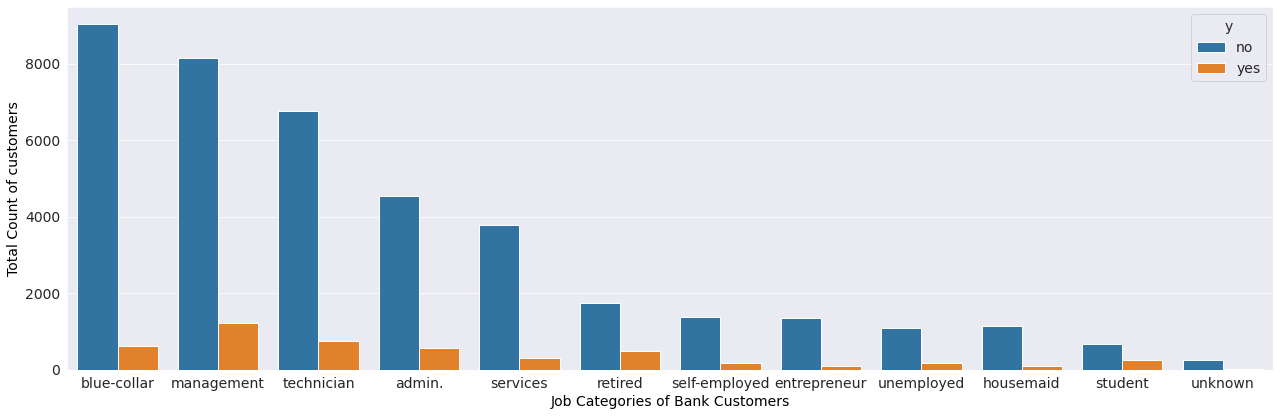

In [ ]:
# check the job categories wise customers who subscribe term deposit or not using bivariate analysis

plt.figure(figsize=(18,6))
sns.countplot(x='job',hue='y', data=bank_df, order=bank_df['job'].value_counts().index)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of customers', color='black')
plt.tight_layout()
plt.show()

**observations :-**
- The histogram of job categories of bank customers shows that the bank targets more customers in job categories such as management, blue-collar, technician, admin, and services, while contacting fewer customers in job categories such as entrepreneurs, self-employed, unemployed, students, and housemaids. However, it is interesting to note that the customers in job categories of students and retired show a higher ratio of subscribing to term deposit compared to other job categories.

- The bank should focus more on job categories such as students and retired to increase the subscription rate

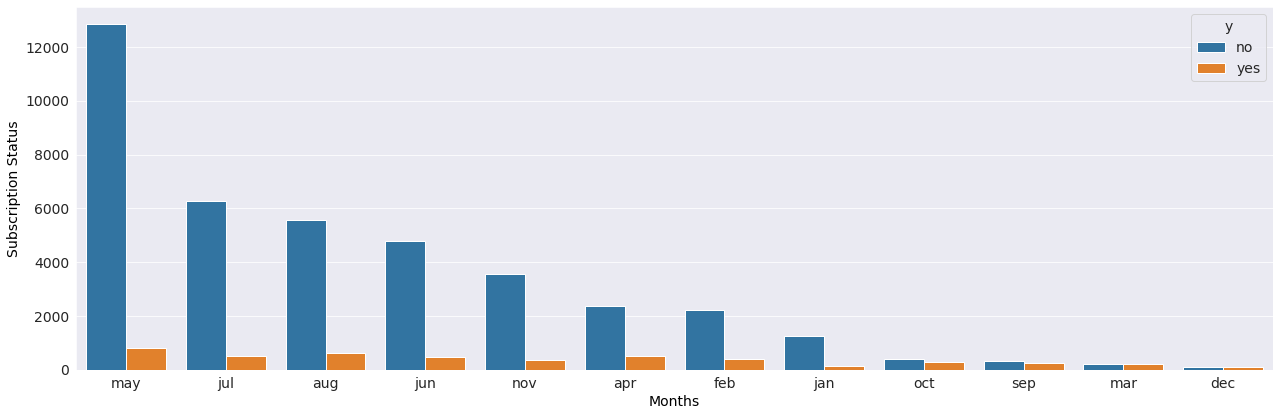

In [ ]:
# check the Subscription Status per month using bivariate analysis

plt.figure(figsize=(18,6))
sns.countplot(x='month',hue='y', data=bank_df, order=bank_df['month'].value_counts().index)
plt.xlabel('Months', color='black')
plt.ylabel('Subscription Status', color='black')
plt.tight_layout()
plt.show()

**observations :-**
- we can observe that the subscription rate is low during the months of September, October, December, January, and March, and the number of customer contacts is also low during these months. However, the subscription rate is relatively good compared to the number of customer contacts during these months. Therefore, to improve the subscription rate, we can focus on increasing the number of customer contacts during these months and encourage them to subscribe to the term deposit.

- the subscription rate for the other months, it can be seen that the subscription rate is low overall, regardless of the number of contacts made. This indicates that the bank needs to improve its marketing strategy and promotion of term deposit subscription to attract more customers.

In [ ]:
# find percentage of customers in remaining categorical variables using univariate analysis

categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for column in categorical:
    fig = px.pie(bank_df, names=column, title=f"Customers Percentage for column {column}", 
                 hole=0.3, color_discrete_sequence=px.colors.qualitative.Plotly)
    fig.update_traces(textinfo='percent+label')
    fig.show()

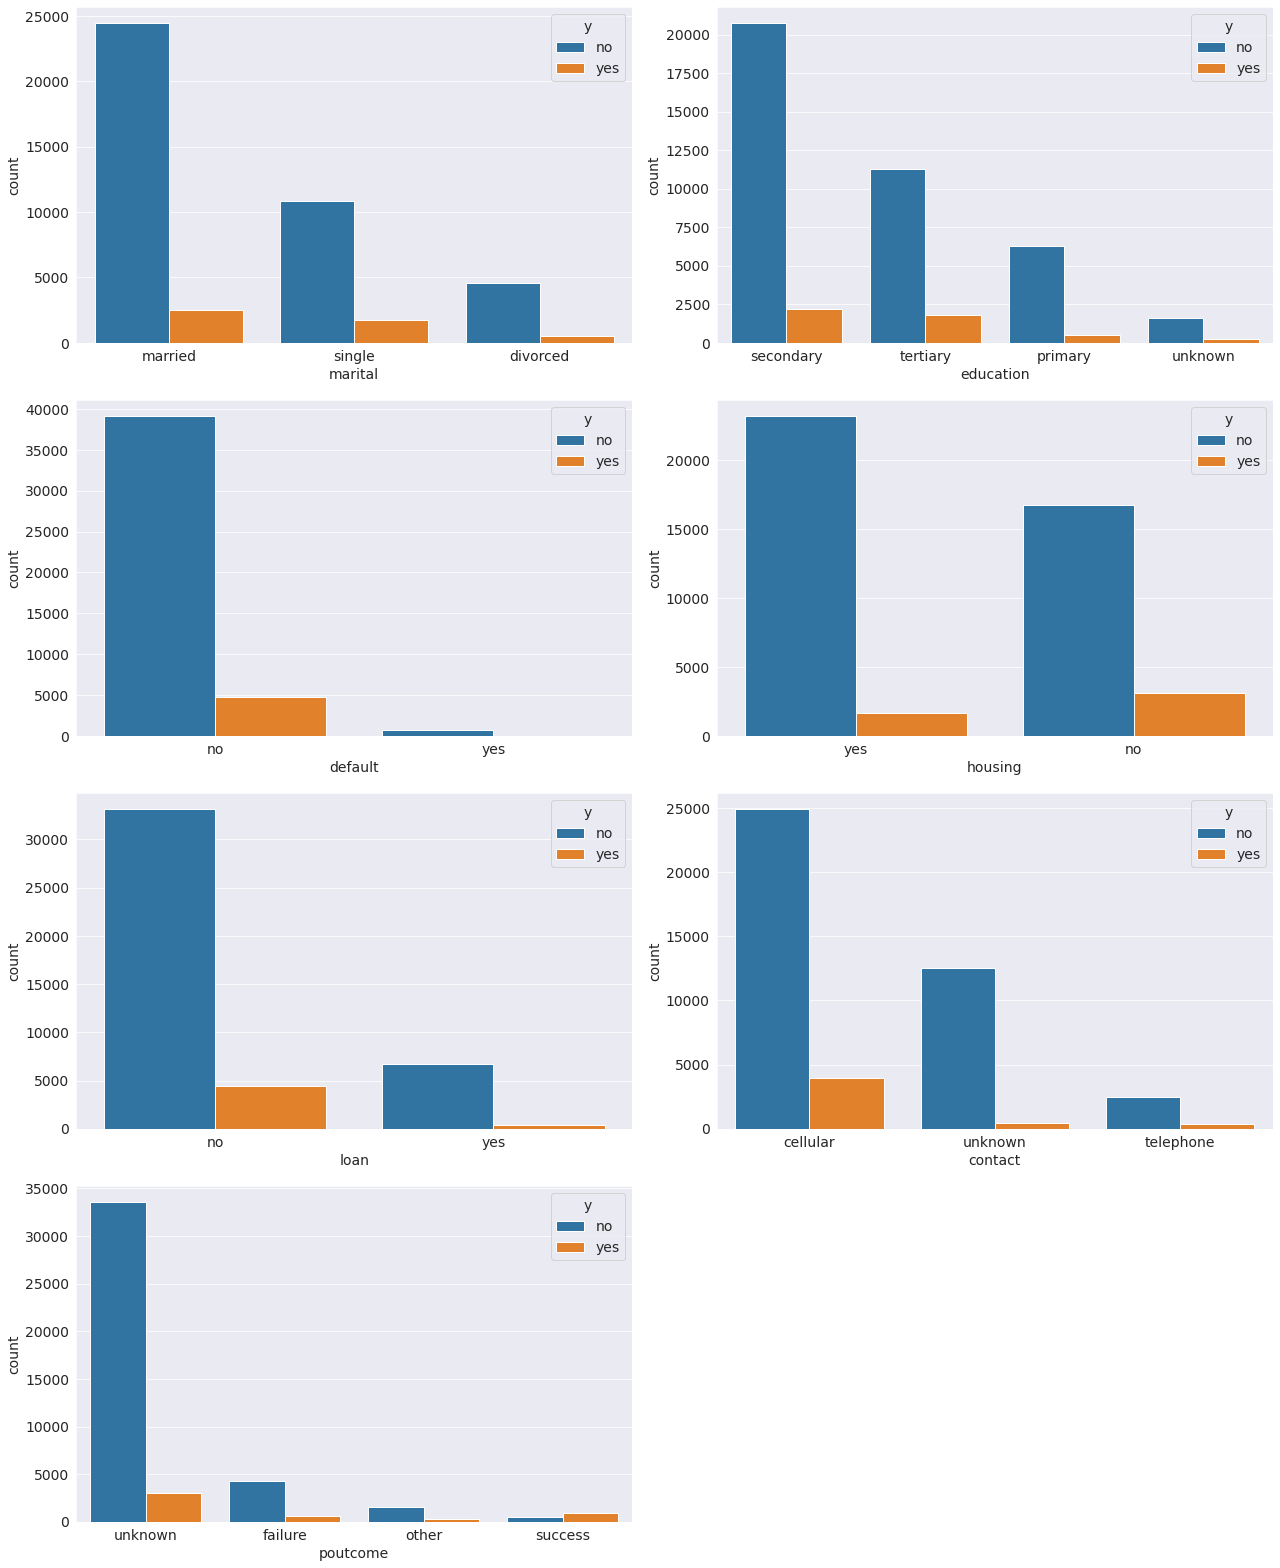

In [ ]:
# bivariate analysis of remaining categorical variables and target column y(term deposit)

categorical = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

plt.figure(figsize=(18,22))
n = 1
for column in categorical:
  ax = plt.subplot(4,2,n)
  sns.countplot(x = column, hue='y', data=bank_df, order=bank_df[column].value_counts().index)
  plt.xlabel(column)
  plt.tight_layout()
  n += 1
plt.show()  

**observations :-**
- Customers who do not have any personal, housing loan, or credit default have a higher ratio of subscribing to term deposit compared to those who have loans or credit defaults.

- In the education column, the percentage of customers who subscribed to term deposits is higher for those in the secondary and tertiary education categories. This suggests that the bank should focus more on customers in these categories.

- In the marital column, there is no clear pattern in the subscription ratio. However, the bank should focus more on married and single customers who are students. This is because we observed in the previous chart that students have a higher subscription ratio in the job column.

- In the poutcome column, we clearly see that customers who subscribed to term deposits in the previous marketing campaign are more likely to subscribe again. This indicates a high chance of success in targeting these customers.

### **`Univariate and Bivariate Analysis of numerical variables`**

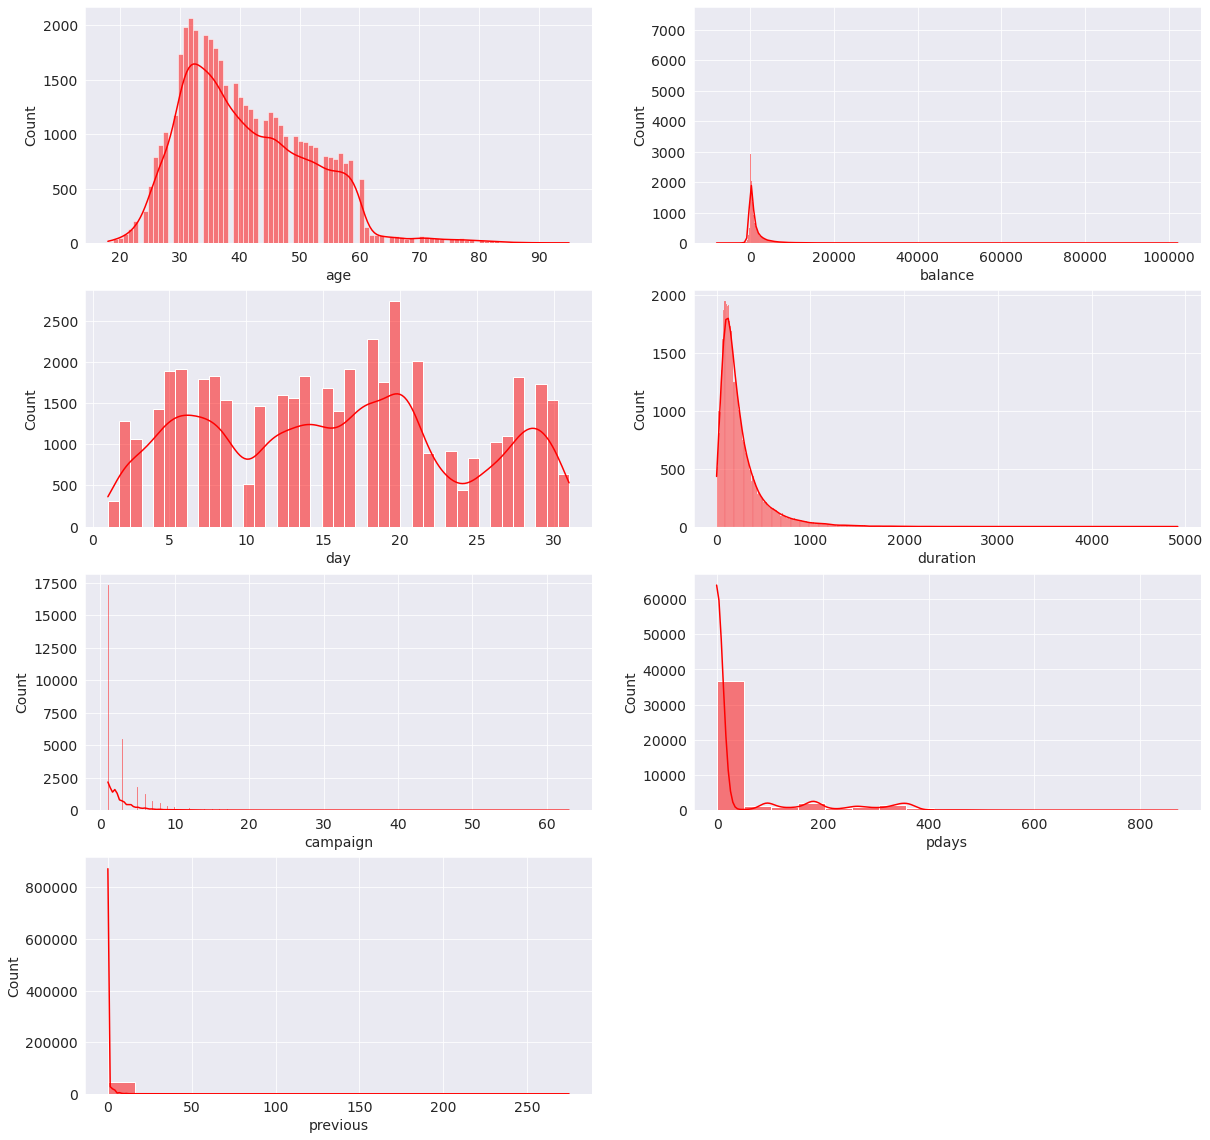

In [ ]:
# check distribution of all numerical column

plt.figure(figsize=(20,20))

n=1
for col in numerical_columns:
  ax = plt.subplot(4,2,n)
  sns.histplot(bank_df[col], kde=True, color ='red')
  n += 1
plt.show()

**observations :-**
- The numerical columns 'age', 'balance', and 'duration' are right skewed, indicating that there may be some outliers present in the data. they are far away from the normal range of values and can significantly affect the analysis

- As per the histogram, there are some customers who are above 65+ years of age and have been contacted for term deposit. This may not be a sensible strategy as these customers may not have a long enough investment horizon to benefit from the term deposit. we have to analysis of old age customers subscribed and non-subscribed ratio.

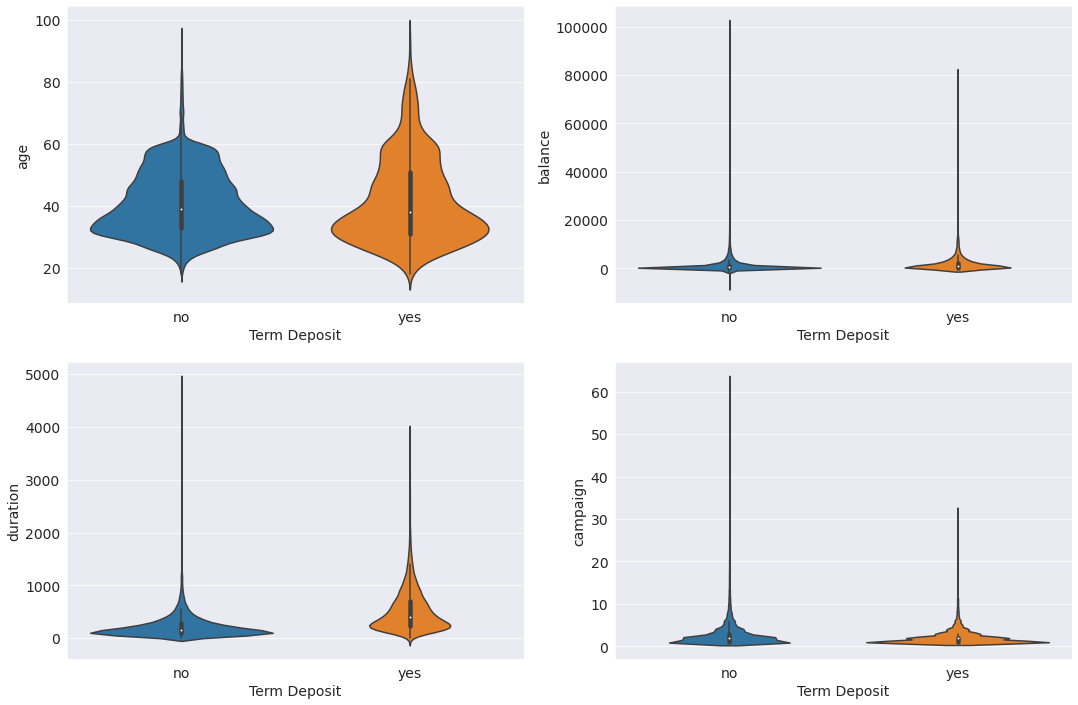

In [ ]:
# Visualizing the distribution of customers subscribed or not term deposit using a violin plot with numerical columns

columns = ['age','balance','duration','campaign']

plt.figure(figsize=(18,12))
n=1
for col in columns:
  ax = plt.subplot(2,2,n)
  sns.violinplot(x='y', y=col ,data=bank_df)
  plt.xlabel('Term Deposit')
  n += 1
plt.show()

**observations:-**
- `Age :` From the violin plot, we can observe that customers in **the age group of 20 to 30** have a higher chance of subscribing to the term deposit. However, after **60+ age**, there is also a high ratio of customers who subscribed. It is important to note that the number of customers contacted in the **60+ age** group is less, which could be a factor in the observed trend.

- `Balance :` The distribution of balance suggests that customers with **less balance are less likely to subscribe** to the term deposit.

- `Duration :` We can see that when the duration of the last contact made with the customer is higher, there is a very high chance that the customer subscribed to the term deposit.

- `Campaign :` From the violin plot, we can observe that customers who were contacted **5 or fewer times** during the current marketing campaign are more likely to subscribe to the term deposit.

▪  These observations suggest that age, balance, duration, and campaign are important factors in determining whether a customer will subscribe to the term deposit.

### **`Bivariate Analysis of both categorical and numerical variables`**

In [ ]:
bank_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

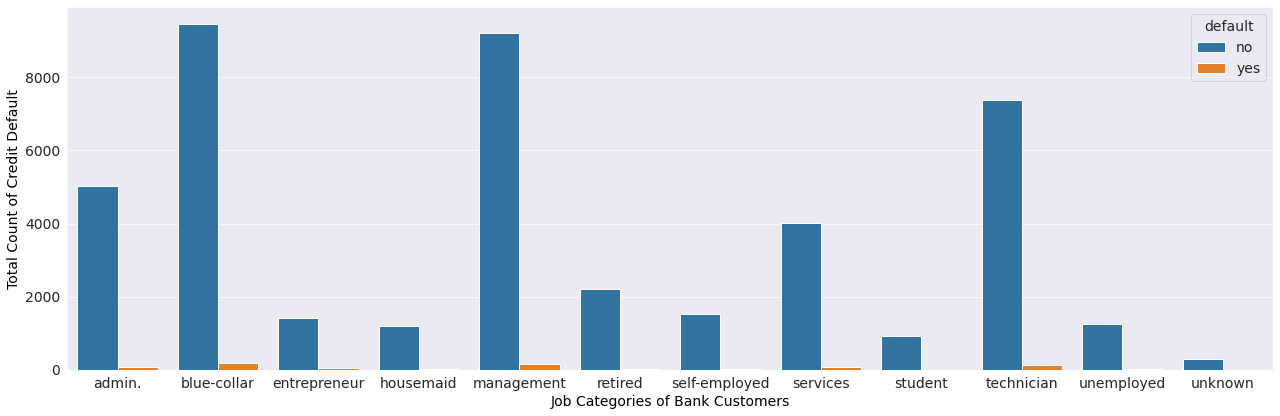

In [ ]:
plt.figure(figsize=(18,6))

sns.countplot(x='job', hue='default', data=bank_df)
plt.xlabel('Job Categories of Bank Customers', color='black')
plt.ylabel('Total Count of Credit Default', color='black')

plt.tight_layout()
plt.show()

**observations :-**
- Based on the previous analysis, it can be observed that student and retired customers have a higher likelihood of subscribing to term deposits. This could be due to the fact that they have a lower number of credit defaults, as well as potentially having more available time and resources to consider long-term investments.

- Furthermore, it is important for the bank to focus on customers in certain job categories, such as blue-collar, admin, management, and services. These categories have shown a significant portion of customers subscribing to term deposits.

- On the other hand, it may not be a good strategy to contact customers in categories such as entrepreneur, unemployed, and self-employed as they have shown a lower likelihood of subscribing to term deposits. However, it is important to note that there may be other factors such as bank balance and loan status that could also influence a customer's decision to subscribe.

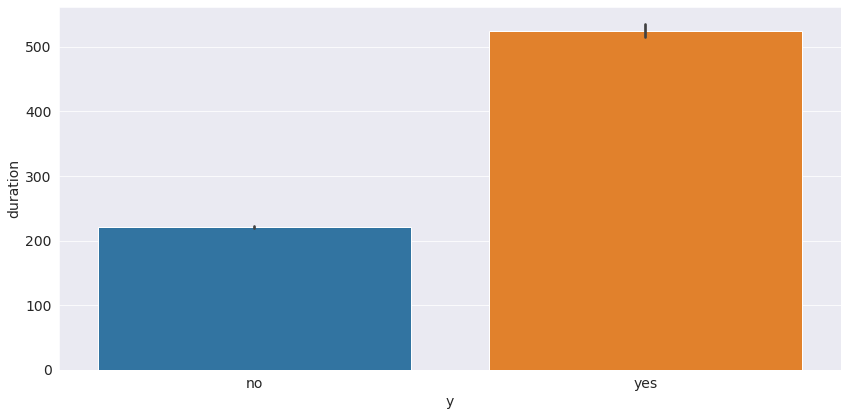

In [ ]:
# check the average duration of customers based on term deposit

plt.figure(figsize=(12,6))

sns.barplot(y='duration',x='y',data=bank_df)
plt.tight_layout()
plt.show()

**observation :-**  If the duration of the last contact made with the customer is **500+ seconds**, then the ratio of subscribed and non-subscribed customers becomes equal and more in favor of subscribed customers.

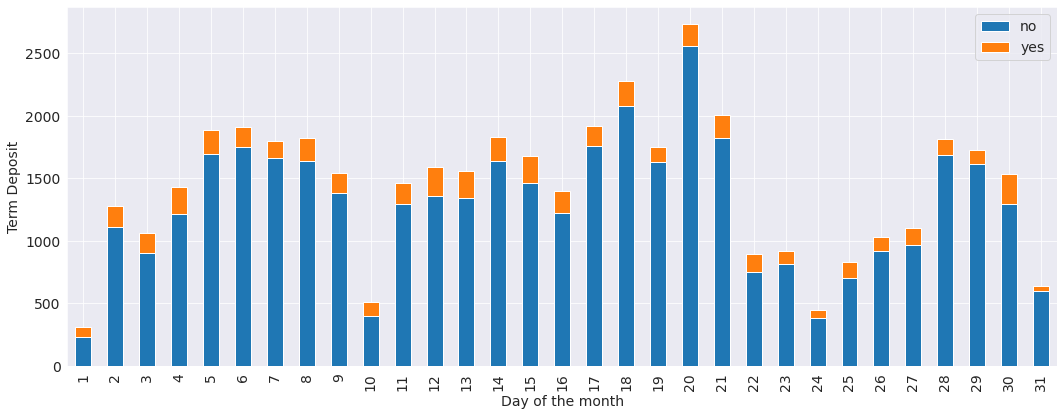

In [ ]:
# find out which day of the month was the client contacted more

types = bank_df.groupby("day")['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', stacked='True', xlabel=('Day of the month'), ylabel=('Term Deposit'), figsize=(15,6))
plt.tight_layout()
plt.show()

- The larger number of clients were contacted during the middle of the month. However, the ratio of term deposits remained relatively consistent throughout the days of the month, except for the last day (day 30), which had a slightly higher chance of customers subscribing to term deposits. Therefore, it would be beneficial for the bank to focus more on the last day of the month for contacting customers. This could be due to various reasons, such as customers being more willing to invest towards the end of the month when they have a better understanding of their monthly budget, or the bank having better offers or incentives towards the end of the month to encourage customers to invest in term deposits.

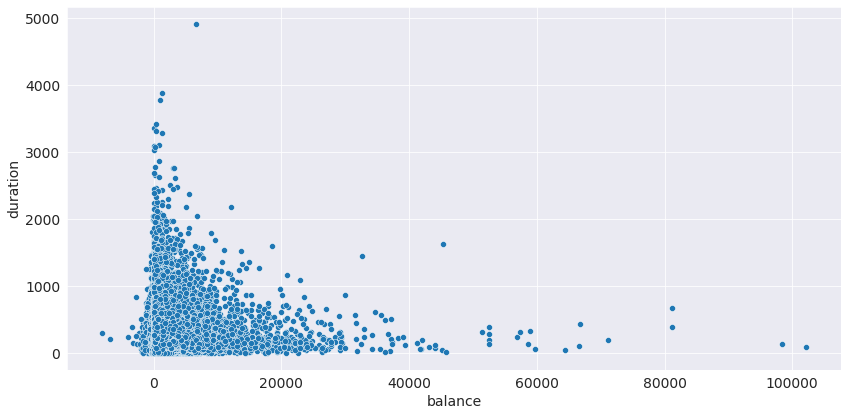

In [ ]:
# checking the corr. of balance and duration column

plt.figure(figsize=(12,6))

sns.scatterplot(x='balance', y='duration', data=bank_df)
plt.tight_layout()
plt.show()

 **Note:-** 
 - From the scatter plot, we can observe that customers with a low or zero bank balance are contacted more frequently by the bank. This strategy may not be the most effective as customers with low balance have a higher ratio of non-subscribed term deposit. Hence, the bank should focus on medium and high bank balance customers when contacting them to increase the likelihood of a positive outcome.

---
## **Features Engineering**

### **`Check Outliers`**

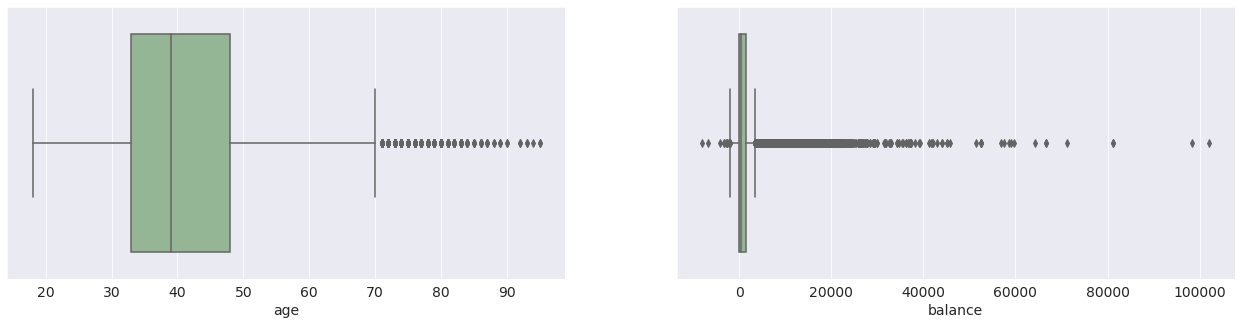

In [ ]:
# ploting a boxplot for numerical features to check the outliers

columns = ['age','balance']

plt.figure(figsize=(22,5))

n = 1
for col in columns:
    ax = plt.subplot(1,2,n)
    sns.boxplot(x=bank_df[col], color='#8FBC8F')
    plt.xlabel(col)
    n += 1
plt.show()

- In these scenarios, it is not advisable to remove outliers from the dataset as they contain valuable information. For example, in the bank balance column, some customers have high balances while some have non-positive balances. If we remove these outliers, our model will not have sufficient information to make accurate predictions, and there is a risk of overfitting.

- Similarly, for the age column, there are outliers in the dataset, but we need to train our model to make predictions based on all available factors. If we remove the outliers, we may lose critical information that can affect the accuracy of our model. Therefore, it is important to keep the outliers in the dataset and use appropriate techniques to handle them during model training. here not any issue because we use robust algorithms.

### **`features transformation and selection`**

In [ ]:
# converting job column into new categorical column by assinging categories

def job_category(job):
  cat_1 = ['retired','student']
  cat_2 = ['blue-collar','management','technician','admin.','services']
  cat_3 = ['unemployed','housemaid','unknown']
  cat_4 = ['self-employed','entrepreneur']

  if job in cat_1 :
      return 'cat1'
  if job in cat_2 :
      return 'cat2'
  if job in cat_3 :
      return 'cat3'
  if job in cat_4 :
      return 'cat4'
  return job

In [ ]:
# apply function job_category for add new column in dataset

bank_df['job_categories']=bank_df['job'].apply(job_category)

bank_df.sample()

age       job  marital  education default  balance housing loan  \
5272   38  services  married  secondary      no      435     yes   no   

      contact  day month  duration  campaign  pdays  previous poutcome   y  \
5272  unknown   23   may       193         2     -1         0  unknown  no   

     job_categories  
5272           cat2

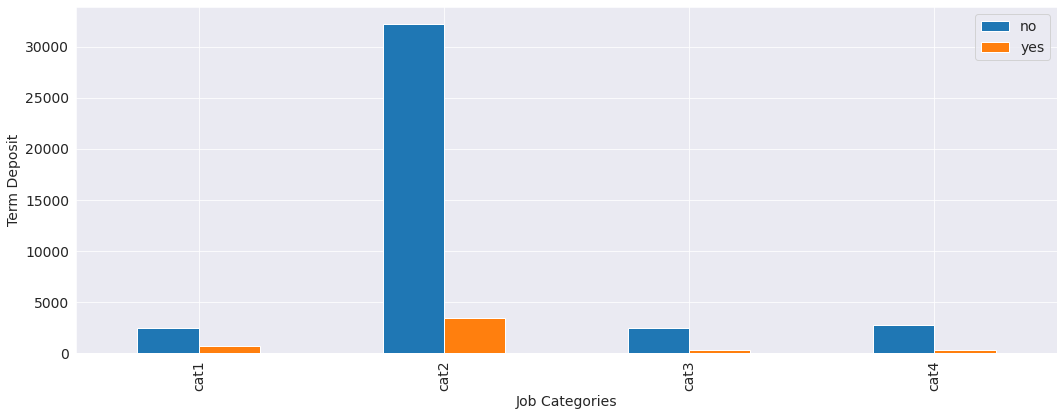

In [ ]:
# explore new column with term deposit(y) column

types = bank_df.groupby('job_categories')['y'].value_counts(normalize=False).unstack()
types.plot(kind='bar', xlabel=('Job Categories'), ylabel=('Term Deposit'), figsize=(15,6))
plt.tight_layout()
plt.show()

**observations :-**

- we observed that category 1 and 2 have a high subscription ratio of term deposit. However, we noticed that the bank contacted more customers in category 2 as compared to category 1. This suggests that the bank should focus more on category 2 customers, but at the same time, they should not ignore category 1 customers as well, because even though the number of customers is less, the ratio of subscribed customers is still high. 

- the bank should try to strike a balance between these two categories and allocate their resources accordingly to maximize their subscription rate.

In [ ]:
# converting age column into new categorical column by assinging categories

def age_category(age):
  if age < 30:
     return 'struggling'
  elif age < 50:
     return 'stable'
  elif age < 60:
     return 'about to retire'
  elif age < 75:
     return 'old age'
  else: 
     return 'counting a last breathe'

In [ ]:
# apply function age_category for add new column in dataset

bank_df['age_categories']=bank_df['age'].apply(age_category)

bank_df.sample()

age          job  marital  education default  balance housing loan  \
37083   35  blue-collar  married  secondary      no      625      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome   y  \
37083  cellular   13   may       267         1     -1         0  unknown  no   

      job_categories age_categories  
37083           cat2         stable

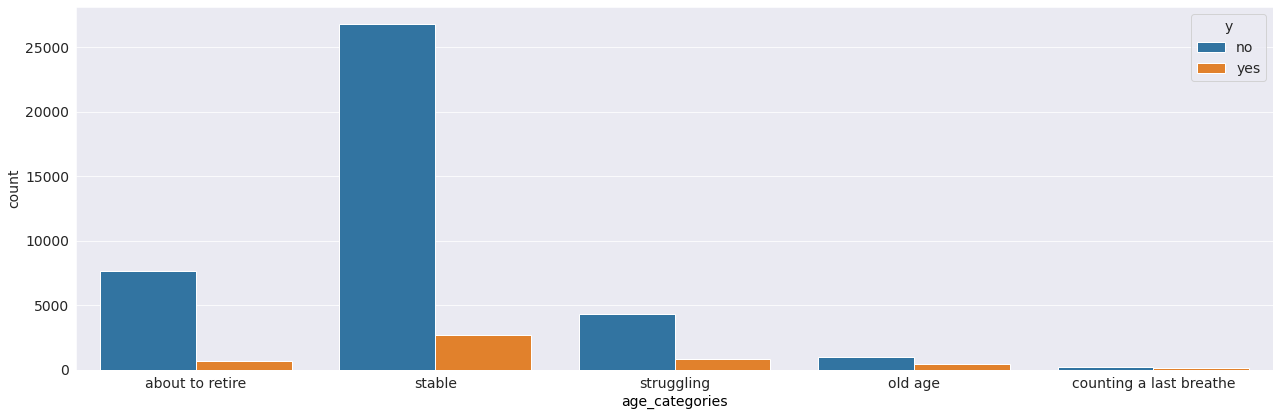

In [ ]:
# explore new column age_categories with term deposit(y) column

plt.figure(figsize=(18,6))

sns.countplot(x='age_categories', hue='y', data=bank_df)
plt.xlabel('age_categories', color='black')
plt.tight_layout()
plt.show()

- bank should focus more on struggling and about to retire categories also

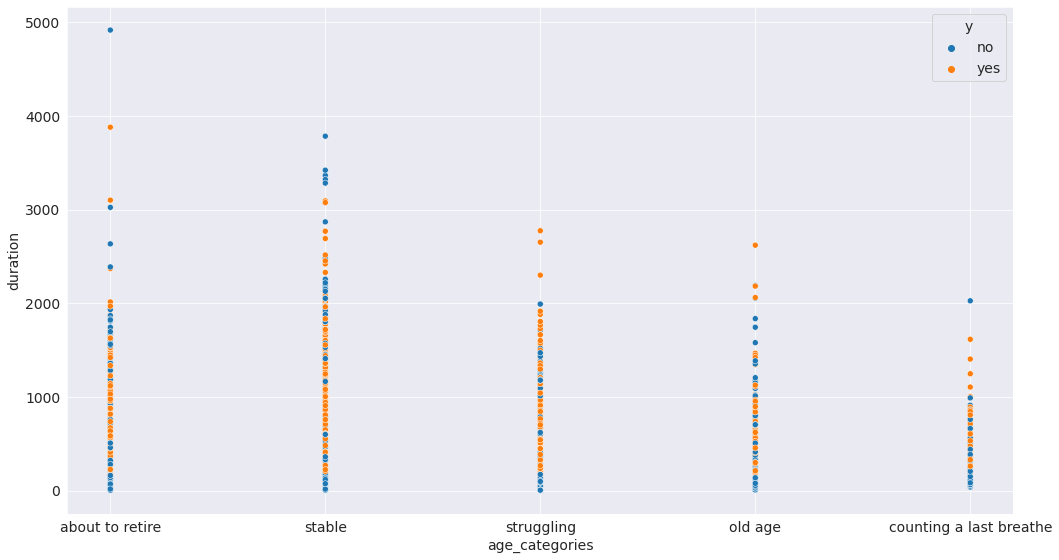

In [ ]:
# scatterplot

plt.figure(figsize=(15,8))
sns.scatterplot(data=bank_df, x='age_categories',y='duration',hue='y')
plt.tight_layout()
plt.show()

**observations:-**

- Conclusion From the above scatter plot we can conclude that when the age categories are old_age and stable the duration of communication is more and when the duration is high then there is high possibility that clients will subscribe for term deposite.

- From the above scatterplot we can conclude that when the contact duration is from 300 to 2000 in stable, struggling, about to retire columns and client balance is in the middle range 500-35000 then those clients subscribe for term deposit mostly.

In [ ]:
# Rename target column 'y' to 'term_deposit'

bank_df = bank_df.rename(columns={'y':'term_deposit'})

In [ ]:
# converting those features into binary class numeric features

bank_df["default"]=bank_df["default"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["loan"]=bank_df["loan"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["housing"]=bank_df["housing"].apply(lambda x : 1 if x=='yes' else 0)
bank_df["term_deposit"]=bank_df["term_deposit"].apply(lambda x : 1 if x=='yes' else 0)

bank_df.sample()

age          job  marital education default  balance housing loan  \
35073   32  blue-collar  married   primary       0       -6       1    0   

        contact  day month  duration  campaign  pdays  previous poutcome  \
35073  cellular    6   may       169         2     -1         0  unknown   

      term_deposit job_categories age_categories  
35073            0           cat2         stable

In [ ]:
# droppping columns because we have extracted new features from that columns.

bank_df.drop(columns=['age','job','pdays','duration'], axis=1, inplace=True)

**Note :-**

- The columns 'pdays' and 'duration' were removed from the dataset as they are not relevant for building a predictive model for new customers. 'duration' represents the duration of the last contact with the customer in the previous campaign, and 'pdays' represents the number of days that have passed since the customer was last contacted. As we are building a model for new customers, this information is not available for them. Hence, removing these columns will prevent any bias or overfitting that may result from using irrelevant or unavailable data.

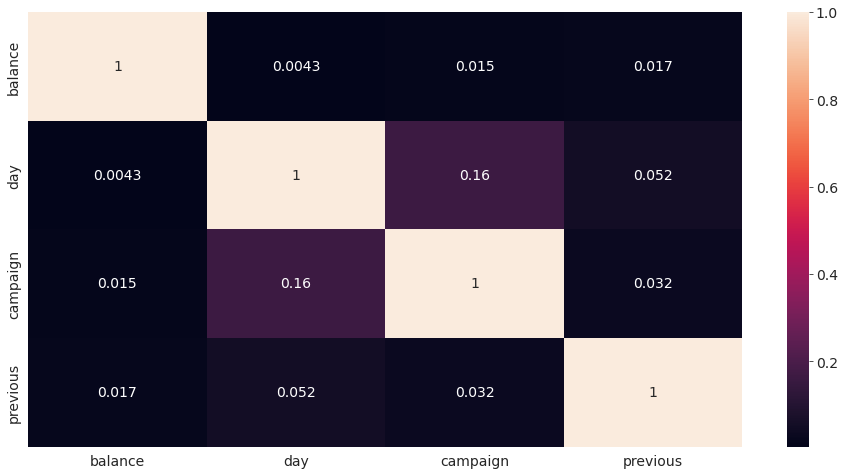

In [ ]:
# Plotting correlation matrix to find multicollinearity

plt.subplots(figsize=(16,8))
sns.heatmap(bank_df.corr().abs(), annot=True)
plt.show()

- there is no significant multicollinearity between the independent variables. Therefore, we can conclude that the model is robust and the independent variables are suitable for predicting the dependent variable.

---
## **pre-processing**

### **`Encoding categorical columns`**

In [ ]:
# Creating dummy variables for categorical variables

marital = pd.get_dummies(bank_df['marital'],prefix='marital')
contact = pd.get_dummies(bank_df['contact'], prefix='contact')
poutcome = pd.get_dummies(bank_df['poutcome'], prefix = 'poutcome')
month = pd.get_dummies(bank_df['month'], prefix = 'month')
age_cat = pd.get_dummies(bank_df['education'],prefix = 'education')
job = pd.get_dummies(bank_df['job_categories'],prefix = 'job_categories')
education = pd.get_dummies(bank_df['age_categories'],prefix = 'age_categories')

In [ ]:
bank_df = pd.concat([bank_df,marital,contact,poutcome,month,education,job,age_cat],axis=1)

In [ ]:
# dropping original column

bank_df.drop(columns=['marital','contact','poutcome','month','education','job_categories','age_categories'], axis=1, inplace=True)

In [ ]:
# dropping one of the resultant columns

bank_df.drop(columns=['marital_divorced','contact_unknown','poutcome_other','month_dec','education_unknown','job_categories_cat3',
                      'age_categories_counting a last breathe'], axis=1, inplace=True)

In [ ]:
bank_df.sample()

default  balance housing loan  day  campaign  previous term_deposit  \
20186       0      361       1    0   11         2         0            0   

       marital_married  marital_single  ...  age_categories_about to retire  \
20186                0               1  ...                               0   

       age_categories_old age  age_categories_stable  \
20186                       0                      1   

       age_categories_struggling  job_categories_cat1  job_categories_cat2  \
20186                          0                    0                    1   

       job_categories_cat4  education_primary  education_secondary  \
20186                    0                  0                    0   

       education_tertiary  
20186                   1  

[1 rows x 36 columns]

In [ ]:
bank_df.shape

(44709, 36)

### **`Splitting Dependent and Independent Variables`**

In [ ]:
#seprating our dependent and independent features

x=bank_df.drop(columns=['term_deposit'],axis=1)
y=(bank_df['term_deposit'])

In [ ]:
x.head()

default  balance housing loan  day  campaign  previous  marital_married  \
0       0     2143       1    0    5         1         0                1   
1       0       29       1    0    5         1         0                0   
2       0        2       1    1    5         1         0                1   
3       0     1506       1    0    5         1         0                1   
4       0        1       0    0    5         1         0                0   

   marital_single  contact_cellular  ...  age_categories_about to retire  \
0               0                 0  ...                               1   
1               1                 0  ...                               0   
2               0                 0  ...                               0   
3               0                 0  ...                               0   
4               1                 0  ...                               0   

   age_categories_old age  age_categories_stable  age_categories_struggling  \
0                       0                      0                          0   
1                       0                      1                          0   
2                       0                      1                          0   
3                       0                      1                          0   
4                       0                      1                          0   

   job_categories_cat1  job_categories_cat2  job_categories_cat4  \
0                    0                    1                    0   
1                    0                    1                    0   
2                    0                    0                    1   
3                    0                    1                    0   
4                    0                    0                    0   

   education_primary  education_secondary  education_tertiary  
0                  0                    0                   1  
1                  0                    1                   0  
2                  0                    1                   0  
3                  0                    0                   0  
4                  0                    0                   0  

[5 rows x 35 columns]

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: term_deposit, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
# shape of the x and y

print(x.shape)
print(y.shape)

(44709, 35)
(44709,)


### **`SMOTE Oversampling for handling class imbalance`**

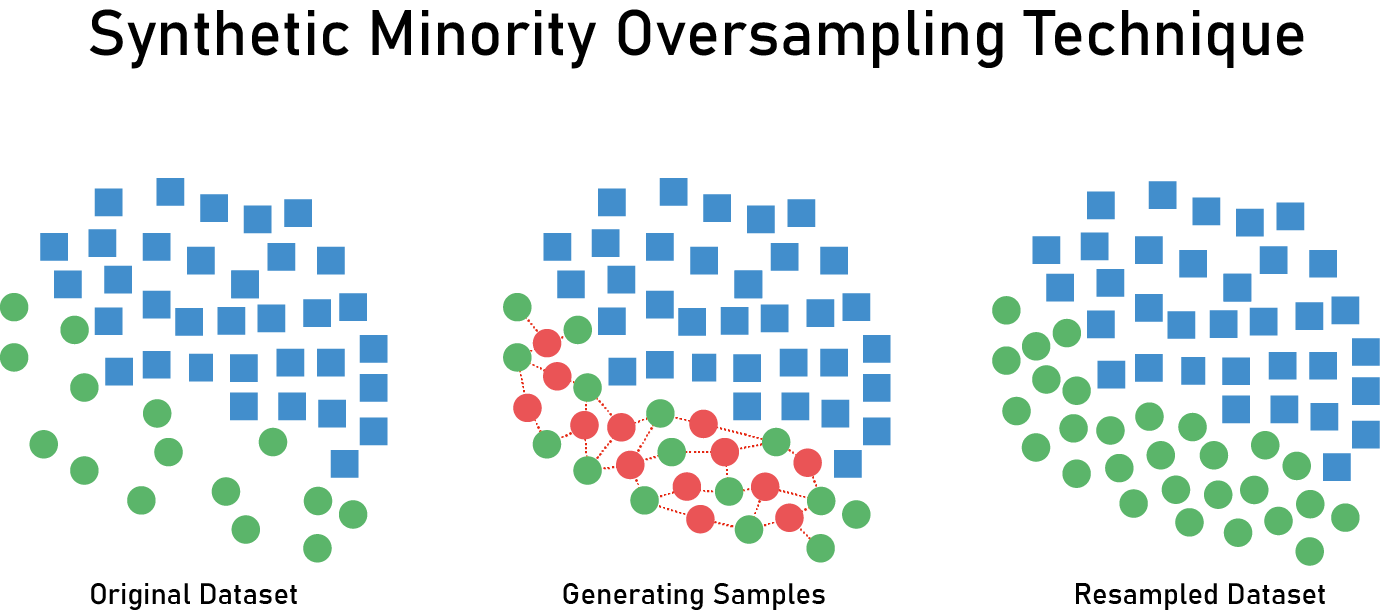

In [ ]:
sampler=SMOTE()
X ,y = sampler.fit_resample(x,y)

In [ ]:
# Original length and Resampled Length

print('Original Dataset length',len(x))
print('Resampled Dataset length',len(X))

Original Dataset length 44709
Resampled Dataset length 79844


---
## **Model implementation and HyperParameter Tuning**

### **`Train, Test and Split`**

In [ ]:
# calling train_test_split() to get the training and testing data.

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

# split sizes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(63875, 35)
(15969, 35)
(63875,)
(15969,)


### **`All Define functions here for model training`**

In [ ]:
# Lets define a function for Evaluation metrics and heatmap of confusion metrix so that we can reuse it again and again

def performance_metrics(actual,prediction,train_actual,train_predicted,model=''):
  print('\033[1m' + '-----------------------------------------' + '\033[0m')
  print(f'{model} Test data accuracy Score', accuracy_score(actual,prediction))
  print(f'{model} Train data accuracy Score', accuracy_score(train_actual,train_predicted))
  print('\033[1m' + '-----------------------------------------' + '\033[0m')
  print(classification_report(actual,prediction))
  print('\033[1m' + '-----------------------------------------' + '\033[0m')

  conf_matrix = confusion_matrix(actual, prediction)
  print(conf_matrix)

  ax = sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
  ax.set_title(f'Confusion Matrix for {model}')
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values')
  ax.set_xticklabels(['No', 'Yes'])
  ax.set_yticklabels(['No', 'Yes'])

  return plt.show()

- Algorithms like KNN, Naive bayes, Logistic Regression and SVM require Standardize Data


In [ ]:
# so stored standardize and normalize data in step1 and step0 using StandardScaler and MinMaxScaler through column transformer

step1 = ColumnTransformer(transformers=[
    ('col_tnf', StandardScaler(),list(range(35))),
],remainder='passthrough')

step0 = ColumnTransformer(transformers=[
     ('col_tnf', MinMaxScaler(),list(range(35))),
],remainder='passthrough')

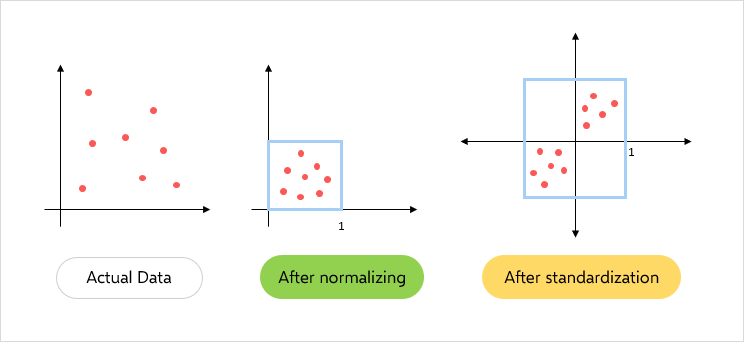

## **`K_nearest Neighbour Classifier(KNN) with hyperparameter tuning`**



Cross-validation score and best params
The best parameters is {'n_neighbors': 5, 'weights': 'uniform'}
cross-validation score 0.9289548647804189
-----------------------------------------
KNN Test data accuracy Score 0.9298641117164507
KNN Train data accuracy Score 0.9453463796477495
-----------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      7913
           1       0.95      0.91      0.93      8056

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969

-----------------------------------------
[[7541  372]
 [ 748 7308]]


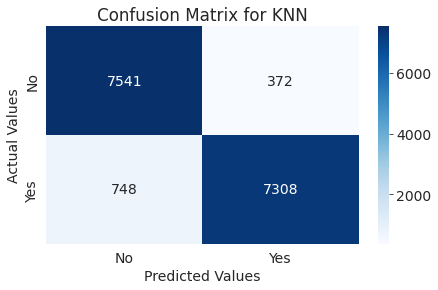

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


# giving parameters different odd values of K(n_neighbors) to find maximum Recall score for Yes(1).
parameters = {'n_neighbors':[5],
              'weights':['uniform']
}

# use gridsearchCV
knn = GridSearchCV(KNeighborsClassifier(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = knn


# make pipeline
pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


# fit the pipeline on training dataset
pipe1.fit(X_train,y_train)

# predict the test dataset 
y_pred_train_knn = pipe1.predict(X_train)
y_pred_knn = pipe1.predict(X_test)

print('\n')
print('\033[1mCross-validation score and best params\033[0m')
print("The best parameters is", knn.best_params_)
print('cross-validation score', knn.best_score_)

# check the accuracy_score, classification_report and heatmap of confusion_matrix
performance_metrics(y_test,y_pred_knn,y_train,y_pred_train_knn,'KNN')

**Note :-**
- we are more interested in correctly predicting the customers who said yes to the term deposit. the proportion of actual positives(Yes) that are correctly classified by the model. In our case, a high recall score for Yes means that we are correctly identifying customers who are more likely to subscribe to the term deposit. so, we need to focus on the recall score of Yes (1) and F1 score for our evaluation metric.

- The Recall Score and F1 score obtained for the KNN classifier model are 0.91 and 0.93 respectively. and precision score is high 0.95. we have to still reduce that predicted false negative value(748)..

- There is very less difference between train and test accuracy so its not overfitting or underfitting. and cross validation score also very good.

- Overall, these scores suggest that KNN is a good starting point for our model implementation. However, we need to evaluate more model algorithms to choose the best one for our specific business problem.


## **`Logistic Regression with hyperparameter tuning`**



Cross-validation Test score and best params
The best parameters is {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
cross-validation score 0.9280155105289303
-----------------------------------------
LogisticRegression Test data accuracy Score 0.9293005197570292
LogisticRegression Train data accuracy Score 0.92826614481409
-----------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      7913
           1       0.97      0.89      0.93      8056

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969

-----------------------------------------
[[7686  227]
 [ 902 7154]]


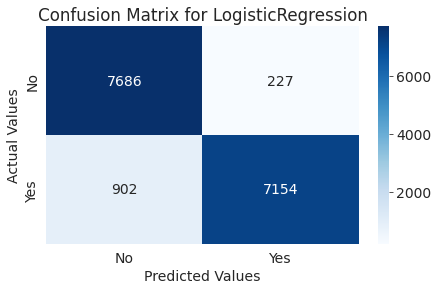

In [ ]:
from sklearn.linear_model import LogisticRegression

# giving parameters for tuning
parameters = {'penalty' : ['l1','l2'],
    'C' : [0.001,0.005,0.01,0.05,0.1,0.5,1,3,5],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100,200,300]
}




# use gridsearchCV 
lr = GridSearchCV(LogisticRegression(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = lr


# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


# fit the pipeline on training dataset
pipe2.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train_lr = pipe2.predict(X_train)
y_pred_lr = pipe2.predict(X_test)

print('\n')
print('\033[1mCross-validation Test score and best params\033[0m')
print("The best parameters is", lr.best_params_)
print('cross-validation score', lr.best_score_)

# check the accuracy_score, classification_report and heatmap of confusion_matrix
performance_metrics(y_test,y_pred_lr,y_train,y_pred_train_lr,'LogisticRegression')

**Note :-**
- The Recall Score and F1 score obtained for the Logistic Regression model are 0.89 and 0.93 respectively. and precision score is 0.97 also higher than knn. but we focused more on recall and f1 score.

- Even though the KNN classifier model had a very good recall score for Yes (1) and overall accuracy, the logistic regression model also showed promising results with slightly lower recall score. It is important to explore multiple algorithms before finalizing the best model. 

## **`Logistic Regression with Polynomial Features (degree=2)`**



Cross-validation Test score and best params
The best parameters is {'C': 0.1, 'penalty': 'l2'}
cross-validation score 0.656656371607991
-----------------------------------------
LR with poly degree 2 Test data accuracy Score 0.6587763792347674
LR with poly degree 2 Train data accuracy Score 0.6561722113502936
-----------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.65      0.65      7913
           1       0.66      0.67      0.66      8056

    accuracy                           0.66     15969
   macro avg       0.66      0.66      0.66     15969
weighted avg       0.66      0.66      0.66     15969

-----------------------------------------
[[5113 2800]
 [2649 5407]]


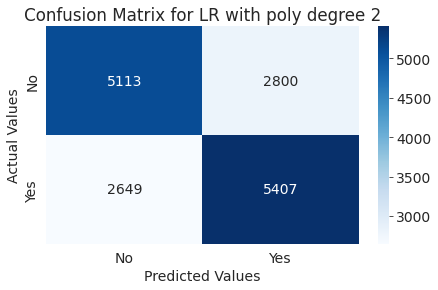

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression


# use polynomial features in logistic regression with degree=2
poly2 = PolynomialFeatures(degree=2)
X_trainP = poly2.fit_transform(X_train)
X_testP = poly2.fit_transform(X_test)


# giving parameters for tuning
parameters = {'penalty' : ['l2'],
              'C' : [0.01,0.05,0.1,0.5,1,2],
}


# use gridsearchCV
lrp = GridSearchCV(LogisticRegression(), param_grid=parameters , cv=10, n_jobs=-1)

step2 = lrp


# make pipeline
pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


# fit the pipeline on training dataset
pipe2.fit(X_trainP,y_train)

# predict the train and test dataset 
y_pred_train_lrp = pipe2.predict(X_trainP)
y_pred_lrp = pipe2.predict(X_testP)

print('\n')
print('\033[1mCross-validation Test score and best params\033[0m')
print("The best parameters is", lrp.best_params_)
print('cross-validation score', lrp.best_score_)

# check the accuracy_score, classification_report and heatmap of confusion_matrix
performance_metrics(y_test,y_pred_lrp,y_train,y_pred_train_lrp,'LR with poly degree 2')



**Note :-**

- The LR with poly degree 2 model has a very low recall score(67%) for class 1(Yes), indicating that the model is not good at correctly classified the customers who will subscribe to the term deposit.

- However, the precision score of class 1(Yes) is only 66%, meaning that out of all the predicted yes values, only 66% were actually true positives. This indicates that the model is predicting a large number of false positives, which can result in a waste of resources and man-hours. 

- The F1 score of the model is also low, indicating that there is a trade-off between precision and recall, and the model is not able to achieve a good balance between the two.

## **`naive bayes`**



Cross-validation Test score and best params
The best parameters is {'priors': None, 'var_smoothing': 1e-09}
cross-validation score 0.8762895636967662
-----------------------------------------
GaussianNB Test data accuracy Score 0.8793286993550004
GaussianNB Train data accuracy Score 0.8765714285714286
-----------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7913
           1       0.89      0.86      0.88      8056

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969

-----------------------------------------
[[7094  819]
 [1108 6948]]


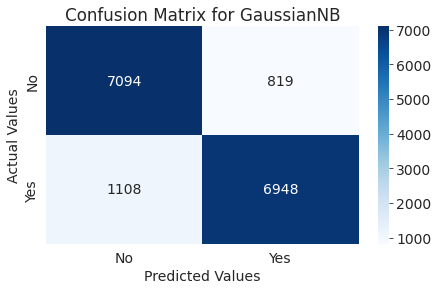

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# giving default parameters
parameters = {'priors' : [None],
              'var_smoothing' : [1e-9]
}

# use gridsearchCV
gnb = GridSearchCV(GaussianNB() , cv=10, param_grid=parameters, n_jobs=-1)

step2 = gnb


# make pipeline
pipe3 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


# fit the pipeline on training dataset
pipe3.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train_gnb = pipe3.predict(X_train)
y_pred_gnb = pipe3.predict(X_test)

print('\n')
print('\033[1mCross-validation Test score and best params\033[0m')
print("The best parameters is", gnb.best_params_)
print('cross-validation score', gnb.best_score_)

# check the accuracy_score, classification_report and heatmap of confusion_matrix
performance_metrics(y_test,y_pred_gnb,y_train,y_pred_train_gnb,'GaussianNB')


**Note :-**
- The Recall Score and F1 score obtained for the GaussianNB model are 0.86 and 0.88 respectively. and precision score is 0.89.

- the KNN classifier model still had a very good recall and precision score for Yes (1) and overall accuracy compare to this GaussianNB model. also It is important to explore some other best algorithms before finalizing the best model.

## **`Support vector machines (SVM)`**

-----------------------------------------
SVM Classifier Test data accuracy Score 0.9351869246665414
SVM Classifier Train data accuracy Score 0.9407436399217222
-----------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7913
           1       0.97      0.90      0.93      8056

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

-----------------------------------------
[[7696  217]
 [ 818 7238]]


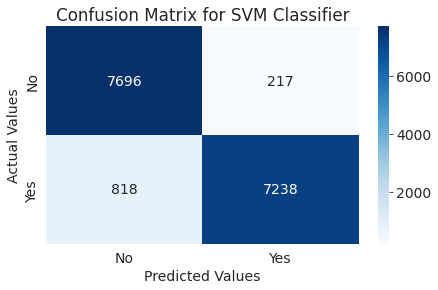

In [ ]:
from sklearn.svm import SVC

svc = SVC()
step2 = svc

# make pipeline
pipe4 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])


# fit the pipeline on training dataset
pipe4.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train_svc = pipe4.predict(X_train)
y_pred_svc = pipe4.predict(X_test)


# check the accuracy_score, classification_report and heatmap of confusion_matrix
performance_metrics(y_test,y_pred_svc,y_train,y_pred_train_svc,'SVM Classifier')

**Notes :-**
- Based on the evaluation metrics such as recall score and F1-score, it appears that the SVM algorithm performs better than the Naive Bayes and Logistic Regression algorithms. The recall and F1-score for SVM are 0.90 and 0.93, respectively, which are higher than the corresponding scores for Naive Bayes and Logistic Regression.

- However, it might be worth trying out other algorithms like Random Forest Classifier and xgboost classifier to see if there is any scope for further improvement in performance.

## **`Random Forest Classifier with hyperparameter tuning`**



Cross-validation Test score and best params
The best parameters is {'max_depth': 18, 'n_estimators': 800}
cross-validation score 0.9378785586015896
-----------------------------------------
RandomForestClassifier Test data accuracy Score 0.9415743002066503
RandomForestClassifier Train data accuracy Score 0.9744187866927593
-----------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7913
           1       0.96      0.92      0.94      8056

    accuracy                           0.94     15969
   macro avg       0.94      0.94      0.94     15969
weighted avg       0.94      0.94      0.94     15969

-----------------------------------------
[[7609  304]
 [ 629 7427]]


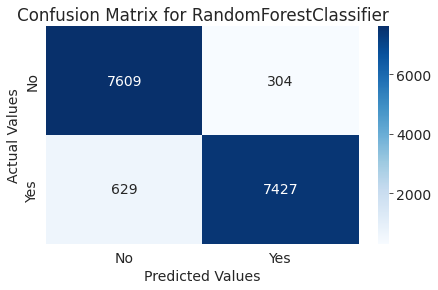

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# giving parameters
parameters = {
    'n_estimators':[800],
    'max_depth' :[18]
}
 
# we use gridsearchCV because the dataset is not that big so we use this not RandomizedSearchCV
rfc = GridSearchCV(RandomForestClassifier(), param_grid=parameters , cv=10)

step2 = rfc

# make pipeline
pipe5 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

# fit the pipeline on training dataset
pipe5.fit(X_train,y_train)

# predict the train and test dataset 
y_pred_train_rfc = pipe5.predict(X_train)
y_pred_rfc = pipe5.predict(X_test)

print('\n')
print('\033[1mCross-validation Test score and best params\033[0m')
print("The best parameters is", rfc.best_params_)
print('cross-validation score', rfc.best_score_)

# check the accuracy_score, classification_report and heatmap of confusion_matrix
performance_metrics(y_test,y_pred_rfc,y_train,y_pred_train_rfc,'RandomForestClassifier')

- the recall and F1-score of random forest classifier is 0.92 and 0.94, which are 1% higher than KNN. The size of the test dataset is around 18k and 1% better recall score from KNN(previous best model), This suggests that the random forest classifier is a promising algorithm for this problem.

- The cross-validation score of 0.938 suggests that the model generalizes well to new data. The accuracy score on the test data is 0.94 and on the train data is 0.97, indicating that there is no overfitting or underfitting.

## **Plot ROC and compare AUC**

In [ ]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)
lr_fpr, lr_tpr, threshold = roc_curve(y_test, y_pred_lr)
auc_lr = auc(lr_fpr, lr_tpr)
lrp_fpr, lrp_tpr, threshold = roc_curve(y_test, y_pred_lrp)
auc_lrp = auc(lrp_fpr, lrp_tpr)
gnb_fpr, gnb_tpr, threshold = roc_curve(y_test, y_pred_gnb)
auc_gnb = auc(gnb_fpr, gnb_tpr)
svc_fpr, svc_tpr, threshold = roc_curve(y_test, y_pred_svc)
auc_svc = auc(svc_fpr, svc_tpr)
rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

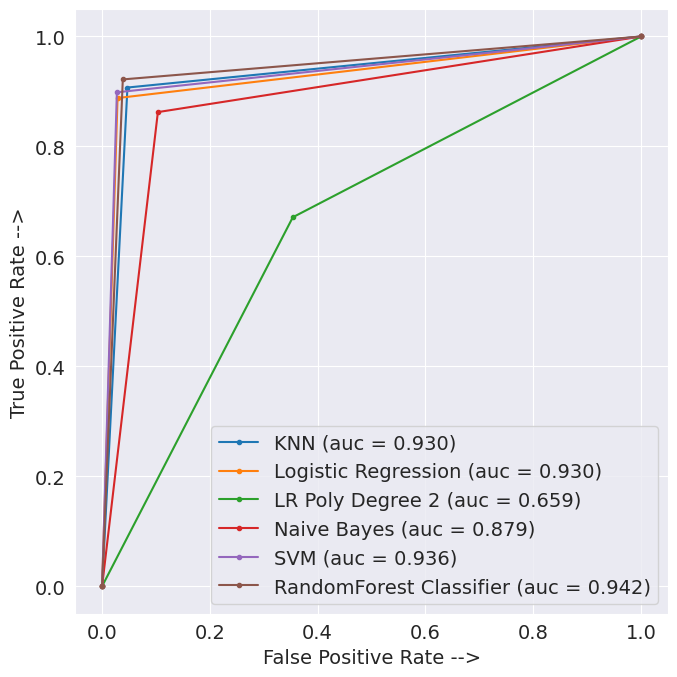

In [ ]:
classifiers = {
    'KNN': (y_pred_knn, knn_fpr, knn_tpr),
    'Logistic Regression': (y_pred_lr, lr_fpr, lr_tpr),
    'LR Poly Degree 2': (y_pred_lrp, lrp_fpr, lrp_tpr),
    'Naive Bayes': (y_pred_gnb, gnb_fpr, gnb_tpr),
    'SVM': (y_pred_svc, svc_fpr, svc_tpr),
    'RandomForest Classifier': (y_pred_rfc, rfc_fpr, rfc_tpr)
}

plt.figure(figsize=(7,7), dpi=100)

for clf_name, (y_pred, fpr, tpr) in classifiers.items():
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, marker='.', label='%s (auc = %0.3f)' % (clf_name, auc_score))

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.tight_layout()
plt.legend()
plt.show()

---
## **Final Summary of Conclusion**

### **`Experiment & Discussion`**



- Six different algorithms are used to solve this problem. Various results have been compared at the end of each model train. A plot is used to compare ROC curves and auc score. Recall score is used as one of the performance matrix.

### **`Why Recall score ?`**


- This is a marketing problem that involves significant resources, making it crucial to optimize results and save resources. The target variable is the **Term deposit**, which indicates whether a potential client says **yes or no** to a term deposit subscription following a phone call. In order to save time and effort, the objective is to focus on those clients who have a higher probability of subscribing to the term deposit. the aim is to predict as many **true positives(For Yes(1) Class)** as possible from the dataset, **making recall score a crucial performance metric**.

- so, here we are more interested in correctly predicting the customers who said yes to the term deposit. the proportion of actual positives(Yes) that are correctly classified by the model. In our case, a high recall score for Yes means that we are correctly identifying customers who are more likely to subscribe to the term deposit. so, **we need to focus more on recall score of Yes (1)** and then precision, F1-Score and also AUC score.

### **`Conclusion`**

- After evaluating the performance of various machine learning algorithms on the given dataset, it was found that the Random Forest Classifier outperformed other algorithms such as KNN, SVM, Naive Bayes, and Logistic Regression. The hyperparameters of the Random Forest Classifier were tuned using GridSearchCV to find the best combination of parameters for optimal performance.

- The cross-validation score for the Random Forest Classifier was found to be 0.937, indicating that the model generalizes well to unseen data. The accuracy score for the test data was 0.94, which is a good indication of the model's ability to perform well on new, unseen data. Additionally, the accuracy score for the train data was 0.97, which indicates that the model did not overfit to the training data.

- Moreover, the Random Forest Classifier achieved a recall score of 0.92 and an F1-score of 0.94, which are slightly better than the corresponding scores for KNN and SVM. Therefore, based on the evaluation metrics and performance results, it can be concluded that the **Random Forest Classifier** is a suitable algorithm for this problem.

- Using these results bank can specifically target clients and gain higher success in their endeavours. Saving a lot of time by not focusing on clients with less probability is yet another advantages of this project.

### **`🥇 RandomForest Classifier with hyperparameter tuning 🥇`** 

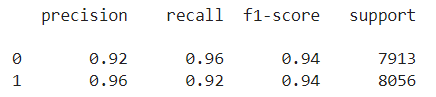

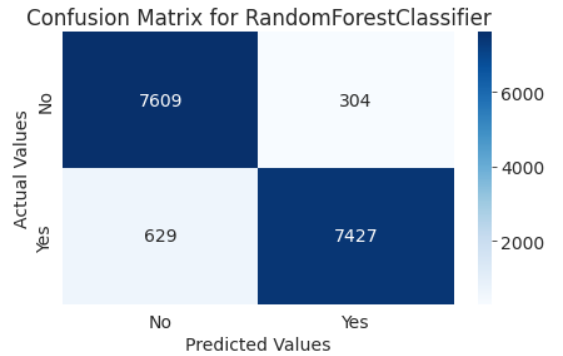

- *At the end a word of Thankyou to you for going through project till the very end, genuinely appreciate your time.* 